# K-cluster Algorithm Analysis

In this script, our objective is to apply unsupervised machine learning to uncover new patterns within the dataset. We will utilize the K-means clustering algorithm to identify distinct clusters and gain insights into their characteristics.

## INDEX

- [Data Cleaning](#Data-Cleaning)
- [Find the Elbow](#Find-the-Elbow)
- [K-means Clustering](#K-means-Clustering)
    - [Economy vs Happiness](#Economy-vs-Happiness)
    - [Trust in the Government vs Happiness](#Trust-in-the-Government-vs-Happiness)
    - [Freedom vs Happiness](#Freedom-vs-Happiness)
    - [Health vs Happiness](#Health-vs-Happiness)
    - [Generosity vs Happiness](#Generosity-vs-Happiness)
    - [Key Insights](#Key-Insights)
<br>  
- [The Descriptive Statistics](#The-Descriptive-Statistics)
    - [Key Takeaways](#Key-Takeaways)
    <br>
    <br>
    
- [Merge clusters](#Merge-happy_level-column-into-the-cleaned-dataset)

In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [225]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [226]:
#import the dataset for World Happiness Report 
path = '/Users/satoruteshima/Documents/CareerFoundry/06 Date Immersion 6/Data/Clean/whr_merged.csv'
df = pd.read_csv (os.path.join(path))

### Data Cleaning

In [227]:
df.shape

(1230, 12)

In [228]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,0,Switzerland,Western Europe,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,1,1,Iceland,Western Europe,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,2,2,Denmark,Western Europe,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,3,3,Norway,Western Europe,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,4,4,Canada,North America and ANZ,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015


In [229]:
#drop unnecessary column including categorical columns
Dropcolumns = ['Unnamed: 0.1'
                ,'Unnamed: 0'
              ,'Country'
              ,'Region'
              ,'Happiness Rank'
              ,'Year']

df = df.drop(columns=Dropcolumns)

### Find the Elbow

In [230]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [231]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/satoruteshima/Documents/CareerFoundry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/satoruteshima/Documents/CareerFoundry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/satoruteshima/Documents/CareerFoundry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/satoruteshima/Documents/CareerFoundry/anacond

[-1894.0863386788997,
 -703.3983181435285,
 -440.8879897629234,
 -318.8743080301696,
 -259.9613739786473,
 -231.20273107159517,
 -209.4522786645686,
 -191.51936846647487,
 -180.1722368955231]

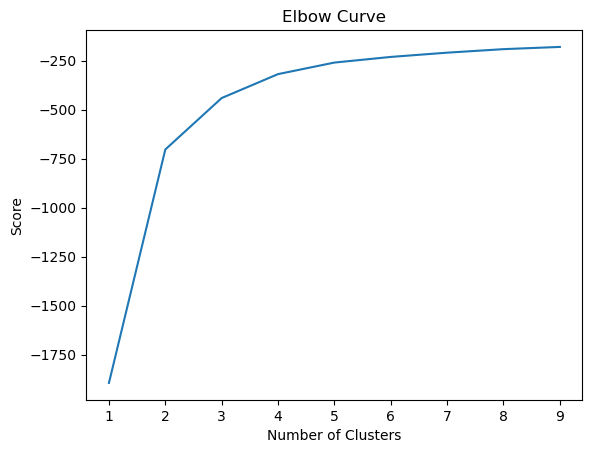

In [232]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**_The curve begins to straightens out after three. This means the optimal number of cluster is three._**

### K-means Clustering 

In [233]:
# Create the k-means object.

kmeans = KMeans(n_init=10,n_clusters = 3) 


In [234]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3, n_init=10)

In [235]:
df['clusters'] = kmeans.fit_predict(df) #adding clusters column to a dataframe

In [236]:
df.head()

,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,clusters
0,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2
1,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2
2,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2
3,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2
4,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2


In [237]:
df['clusters'].value_counts()

0    504
1    414
2    312
Name: clusters, dtype: int64

### Economy vs Happiness 

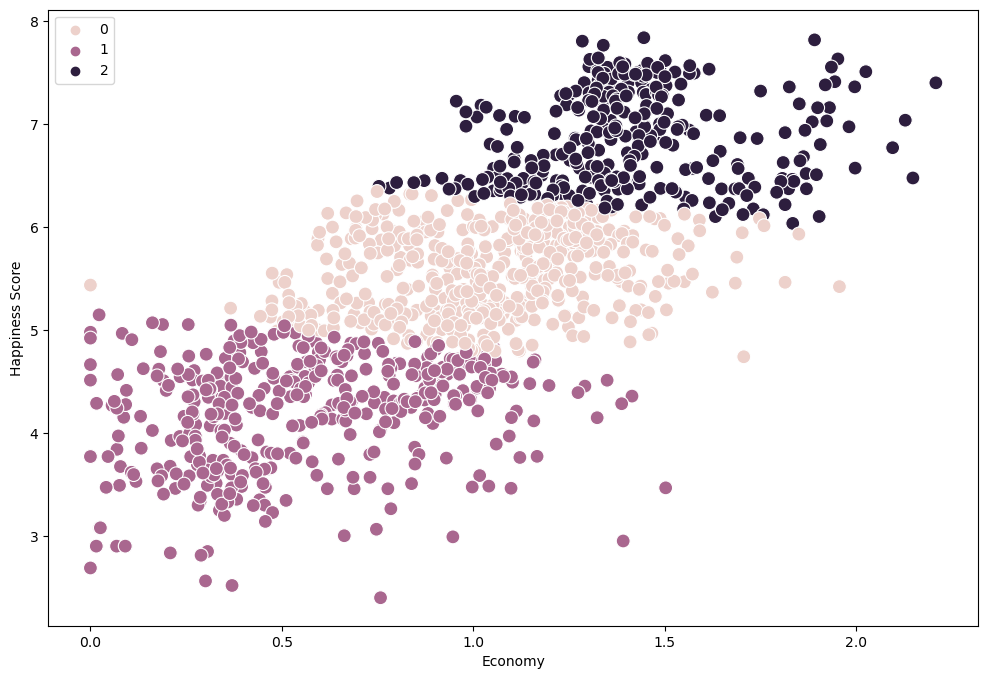

In [238]:
# Plot the clusters for the "Happiness Score" and "Economy(GDP per Capita)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Economy (GDP per Capita)'], y=df['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

### Trust in the Government vs Happiness

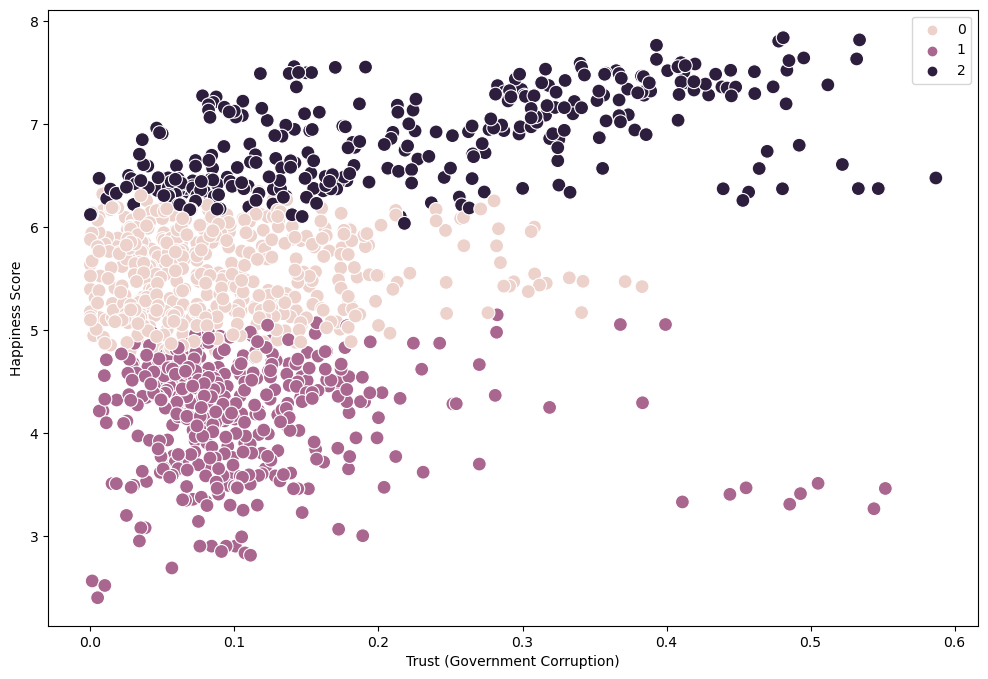

In [239]:
# Plot the clusters for the "Happiness Score" and "Trust (Government Corruption)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Trust (Government Corruption)'], y=df['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Trust (Government Corruption)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

### Freedom vs Happiness

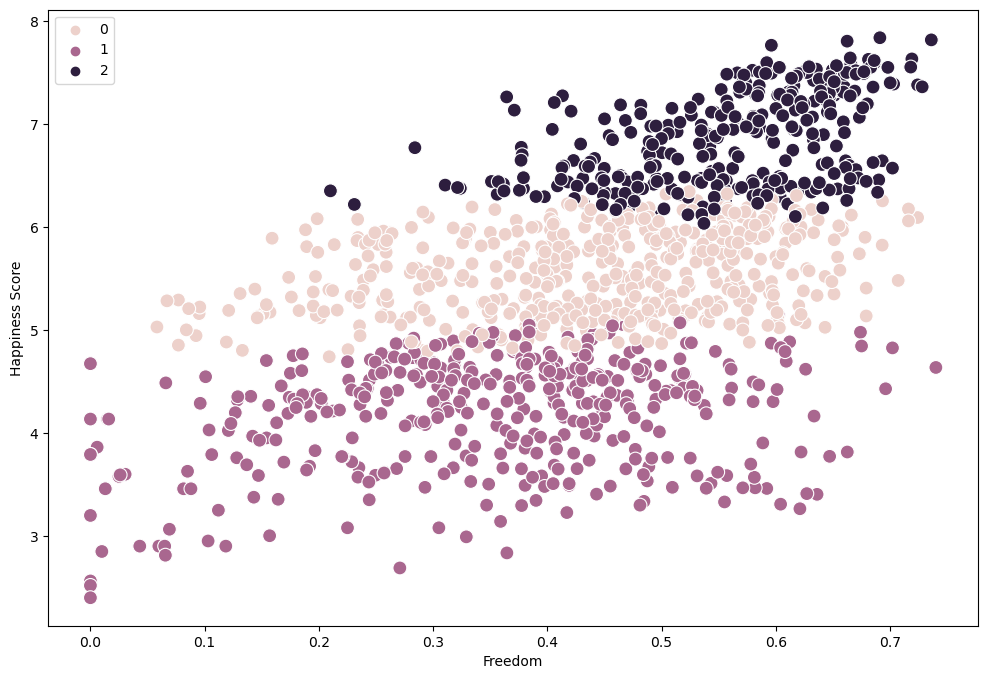

In [240]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Freedom'], y=df['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Freedom') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

### Health vs Happiness

AttributeError: 'Axes' object has no attribute 'garid'

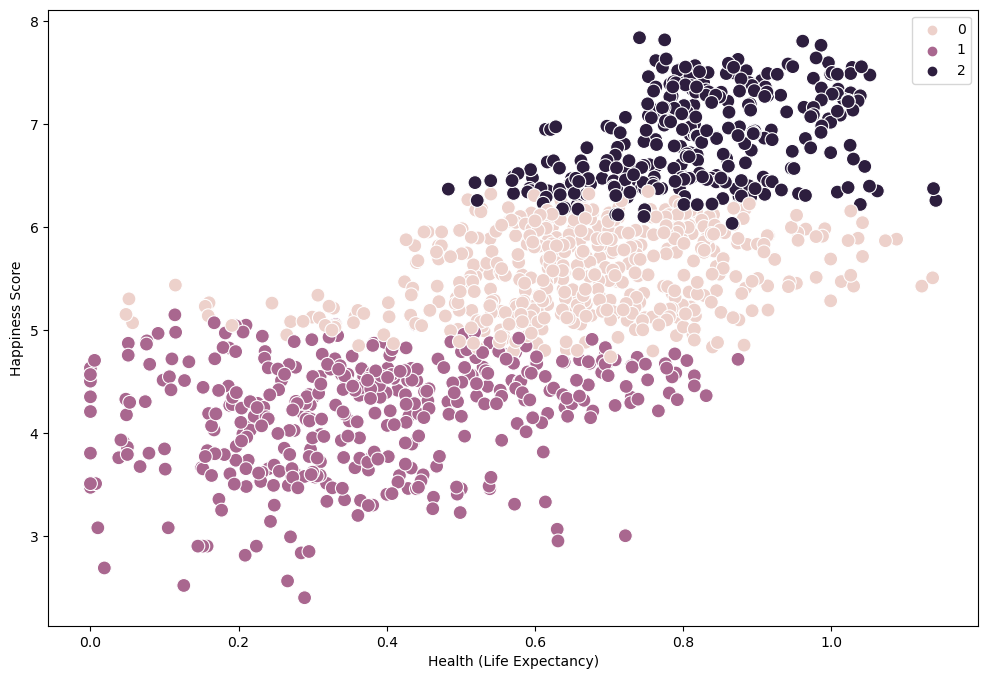

In [241]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Health (Life Expectancy)'], y=df['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.garid(False) # This removes the grid from the background.
plt.xlabel('Health (Life Expectancy)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

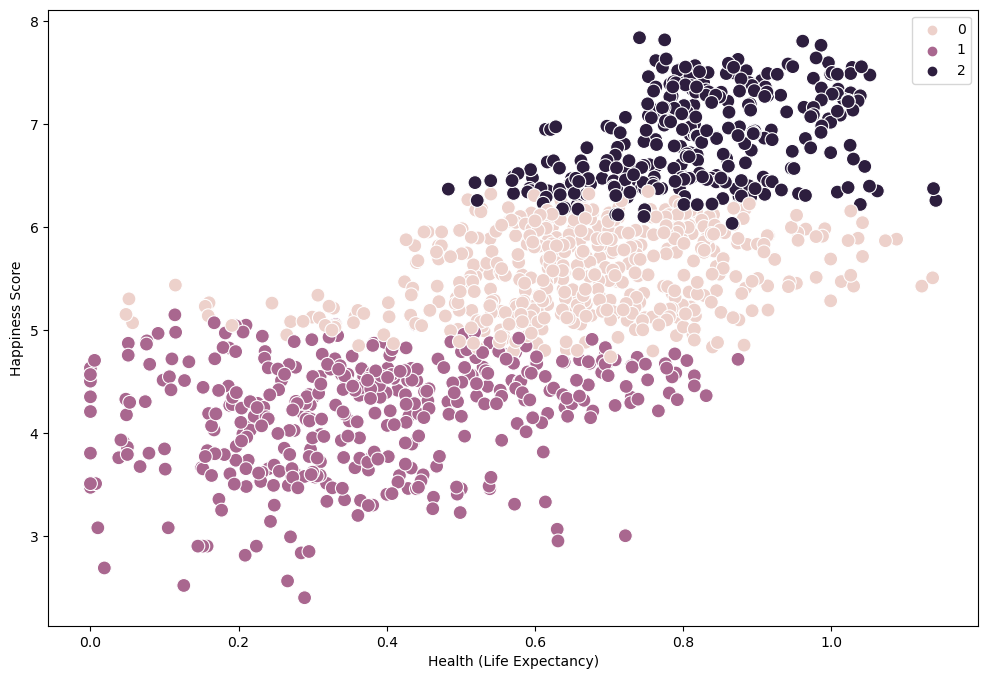

In [261]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df['Health (Life Expectancy)'], y=df['Happiness Score'], hue=kmeans.labels_, s=100)

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Health (Life Expectancy)')  # Label x-axis.
plt.ylabel('Happiness Score')  # Label y-axis.
plt.savefig('happinesshealth.png')

### Generosity vs Happiness

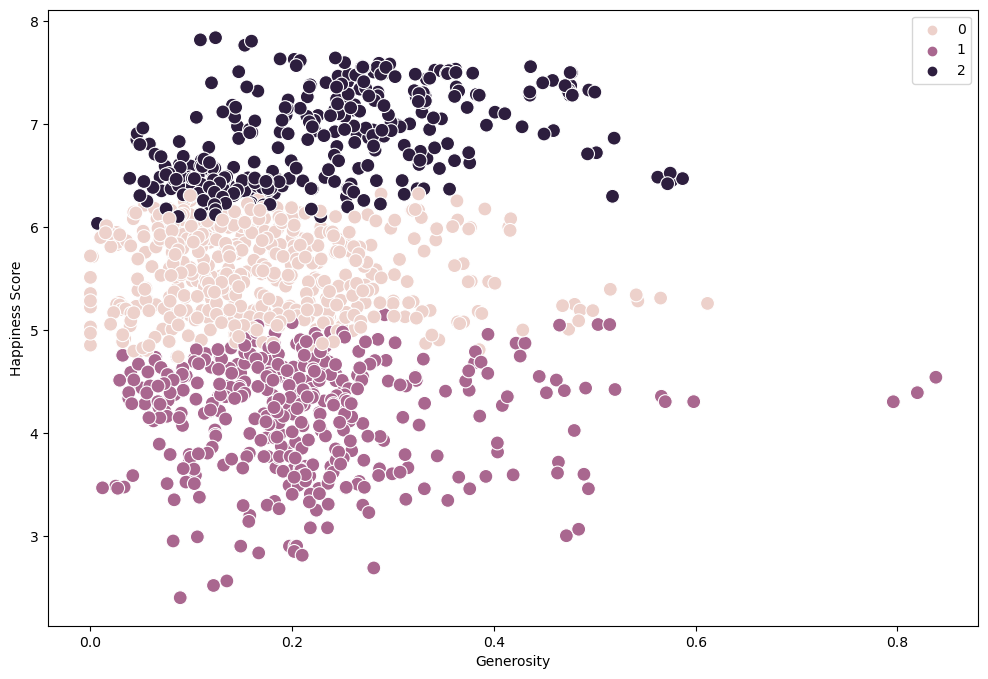

In [242]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Generosity'], y=df['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Generosity') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

### Key Insights

- Both Generosity and Trust in the Government exhibit data points concentrated between 0.0 and 0.4, suggesting that they have minimal impact on the overall happiness score.

- The clusters for freedom, economy, and health all show similar positive slopes, indicating a positive relationship between these factors and happiness.

- In the pink cluster, health and freedom have a wider spread, suggesting that these two factors play a more significant role in influencing the level of happiness.

### The Descriptive Statistics

In [243]:
#rename clusteres
df.loc[df['clusters'] == 2, 'clusters'] = 'dark purple'
df.loc[df['clusters'] == 1, 'clusters'] = 'purple'
df.loc[df['clusters'] == 0, 'clusters'] = 'pink'

In [244]:
df.groupby('clusters').agg({'Happiness Score':['mean', 'median'], 
                         'Economy (GDP per Capita)':['mean', 'median'], 
                         'Health (Life Expectancy)':['mean', 'median'],
                          'Freedom':['mean', 'median'],
                        'Trust (Government Corruption)':['mean', 'median'],
                          'Generosity':['mean','median']}) 
                    

Happiness Score          Economy (GDP per Capita)          \
                       mean   median                     mean  median   
clusters                                                                
dark purple        6.851621  6.82950                 1.411720  1.3795   
pink               5.565111  5.54605                 1.045865  1.0450   
purple             4.194422  4.30955                 0.563335  0.5300   

            Health (Life Expectancy)             Freedom            \
                                mean    median      mean    median   
clusters                                                             
dark purple                 0.818079  0.811955  0.557995  0.573850   
pink                        0.666322  0.661730  0.439702  0.459178   
purple                      0.379072  0.363372  0.353913  0.372842   

            Trust (Government Corruption)           Generosity            
                                     mean    median       mean    median  
clusters                                                                  
dark purple                      0.225514  0.198713   0.235507  0.229897  
pink                             0.091738  0.074000   0.173095  0.154426  
purple                           0.107312  0.088920   0.210697  0.200387

### Key Takeaways

- The purple cluster has the highest overall mean and median, followed by the dark purple cluster, and then the pink cluster.

- When considering Trust in the Government and Generosity, the pink cluster performs slightly better than the dark purple cluster, but this observation might be influenced by outliers.

- Examining both the descriptive statistics and the shapes of scatter plots, all three clusters exhibit a similar pattern. Initially, comparing happiness and exploring key factors by regions seemed like a good idea, but using these three clusters for analysis may provide more valuable insights.

- Renaming the clusters based on different levels of happiness and conducting further data exploration is the next step in our analysis.


`dark purple`- Very happy  
`pink` -   Happy  
`purple` - Ok


In [245]:
df.loc[df['clusters'] == 'dark purple', 'happy_level'] = 'Very Happy'
df.loc[df['clusters'] == 'purple', 'happy_level'] = 'Ok'
df.loc[df['clusters'] == 'pink', 'happy_level'] = 'Happy'

In [246]:
df['happy_level'].value_counts()

Happy         504
Ok            414
Very Happy    312
Name: happy_level, dtype: int64

In [247]:
df= df.drop(columns = ['clusters'])

In [248]:
df.head()

,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,happy_level
0,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,Very Happy
1,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,Very Happy
2,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,Very Happy
3,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,Very Happy
4,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,Very Happy


In [ ]:
#export to csv
path2 = '/Users/satoruteshima/Documents/CareerFoundry/06 Date Immersion 6/Data'
df.to_csv(os.path.join(path2, 'Clean', 'whr_clusteres.csv'))

### Merge `happy_level` column into the cleaned dataset 

In [249]:
#import the cleaned dataset again
path = '/Users/satoruteshima/Documents/CareerFoundry/06 Date Immersion 6/Data/Clean/whr_merged_country_renamed.csv'
df2 = pd.read_csv (os.path.join(path))

In [250]:
#add 'happy_level' 
df2['happy_level'] = df['happy_level']

In [251]:
#drop unnecessary column 
Dropcolumns2 = ['Unnamed: 0.1'
                ,'Unnamed: 0']

df2 = df2.drop(columns=Dropcolumns2)

In [253]:
df2 = df2.drop(columns='Unnamed: 0.2')

In [254]:
df2.head() #check columns

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,happy_level
0,Switzerland,Western Europe,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015,Very Happy
1,Iceland,Western Europe,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015,Very Happy
2,Denmark,Western Europe,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015,Very Happy
3,Norway,Western Europe,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015,Very Happy
4,Canada,North America and ANZ,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015,Very Happy


In [256]:
#export to csv
path2 = '/Users/satoruteshima/Documents/CareerFoundry/06 Date Immersion 6/Data'
df2.to_csv(os.path.join(path2, 'Clean', 'whr_with_happylevel.csv'))

## Back to the [TOP](#INDEX)